<a href="https://colab.research.google.com/github/Masoud0389/Delay-Attack-Detection/blob/main/Delay_Detection_KNN_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pwd

In [5]:
dataset = pd.read_csv('drive/MyDrive/Datasets/DS_Delay2.csv')

In [6]:
X = dataset.iloc[:, :]
y = np.arange(0, 600019)
y = y*0
for i in range(0, 20):
  y[17500+ 30000*i:20000+ 30000*i] = 1
y = pd.DataFrame(y)
#X['l'] = y
#y = dataset.iloc[:, -1]

In [121]:
#print(y[y[0]==1].index.tolist())

[17500, 17501, 17502, 17503, 17504, 17505, 17506, 17507, 17508, 17509, 17510, 17511, 17512, 17513, 17514, 17515, 17516, 17517, 17518, 17519, 17520, 17521, 17522, 17523, 17524, 17525, 17526, 17527, 17528, 17529, 17530, 17531, 17532, 17533, 17534, 17535, 17536, 17537, 17538, 17539, 17540, 17541, 17542, 17543, 17544, 17545, 17546, 17547, 17548, 17549, 17550, 17551, 17552, 17553, 17554, 17555, 17556, 17557, 17558, 17559, 17560, 17561, 17562, 17563, 17564, 17565, 17566, 17567, 17568, 17569, 17570, 17571, 17572, 17573, 17574, 17575, 17576, 17577, 17578, 17579, 17580, 17581, 17582, 17583, 17584, 17585, 17586, 17587, 17588, 17589, 17590, 17591, 17592, 17593, 17594, 17595, 17596, 17597, 17598, 17599, 17600, 17601, 17602, 17603, 17604, 17605, 17606, 17607, 17608, 17609, 17610, 17611, 17612, 17613, 17614, 17615, 17616, 17617, 17618, 17619, 17620, 17621, 17622, 17623, 17624, 17625, 17626, 17627, 17628, 17629, 17630, 17631, 17632, 17633, 17634, 17635, 17636, 17637, 17638, 17639, 17640, 17641, 17642

# Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [18]:
from sklearn.utils.sparsefuncs import min_max_axis
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
#scaler = RobustScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)
#maxabs_scaler = MaxAbsScaler()
#X_train_scaled = maxabs_scaler.fit_transform(X_train)
#X_test_scaled = maxabs_scaler.fit_transform(X_test)
#min_max_scaler = preprocessing.MinMaxScaler()
#X_train_scaled = min_max_scaler.fit_transform(X_train) 
#X_test_scaled = min_max_scaler.fit_transform(X_test) 
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_train_normalized = normalize(X_train_scaled, norm = 'max')
X_test_normalized = normalize(X_test_scaled, norm = 'max')
# Converting the numpy array into a pandas DataFrame
X_train_normalized = pd.DataFrame(X_train_normalized)
X_test_normalized = pd.DataFrame(X_test_normalized)

# Feature Selection/Reduction

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, whiten= True)
X_train_principal = pca.fit_transform(X_train_normalized)
X_train_principal = pd.DataFrame(X_train_principal)
X_test_principal = pca.fit_transform(X_test_normalized)
X_test_principal = pd.DataFrame(X_test_principal)

# Plot Test

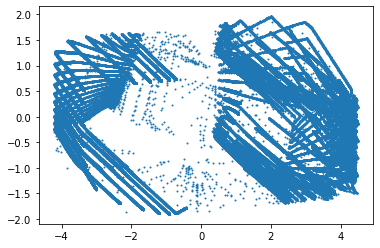

In [22]:
plt.scatter(X_train_principal.iloc[:,0], X_train_principal.iloc[:,1], s = 1 , alpha=1)

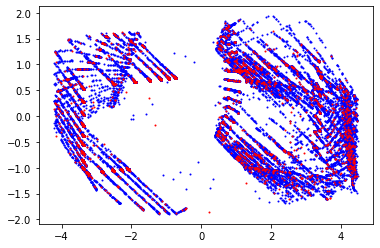

In [23]:
plt.scatter(X_train_principal.iloc[:17500,0], X_train_principal.iloc[:17500,1], c = 'b', s = 1 , alpha=1)
plt.scatter(X_train_principal.iloc[20000:30000,0], X_train_principal.iloc[20000:30000,1],c = 'b', s = 1 , alpha=1)
plt.scatter(X_train_principal.iloc[17500:20000,0], X_train_principal.iloc[17500:20000,1], c = 'r', s = 1 , alpha=1)
plt.show()

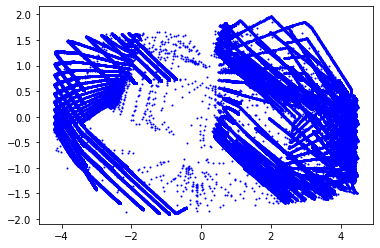

In [42]:

#print(X_principal.iloc[:,0])
plt.scatter(X_train_principal.iloc[:,0], X_train_principal.iloc[:,1],c = 'b', s = 1 , alpha=1)
#for i in range(0, 20):
#  plt.scatter(X_train_principal.iloc[17500 + 30000*i:20000+ 30000*i,0], X_train_principal.iloc[17500+ 30000*i:20000+ 30000*i,1],c = 'r', s = 1 , alpha=1)
#plt.title('Scatter plot')
#plt.xlabel('x')
#plt.ylabel('y')
#plt.show()

# Anomaly Detection

In [88]:
#from sklearn.utils import multiclass
#from sklearn.linear_model import LinearRegression
#reg = LinearRegression().fit(X_train_principal, y_train)


In [133]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_principal, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [89]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train_principal, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
#from sklearn.svm import SVC
#classifier = SVC(kernel = 'linear', random_state = 0)
#classifier.fit(X_train_principal, y_train)

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#classifier = DecisionTreeClassifier(criterion = 'entropy')
#classifier.fit(X_train_principal, y_train)

In [ ]:
#from sklearn.cluster import DBSCAN
# Numpy array of all the cluster labels assigned to each data point
#db_default = DBSCAN(eps = 0.1, min_samples = 1000000).fit_predict(X_principal)
#label = db_default.labels_
#labels.to_csv('test_DBSCAN1.csv')

In [ ]:
#from sklearn.ensemble import IsolationForest
#label = IsolationForest(n_estimators= 50, contamination=0.13, max_samples=5000).fit_predict(X_principal)

In [ ]:
#from sklearn.cluster import OPTICS
#label = OPTICS(min_samples= 10000).fit_predict(X_principal)

In [ ]:
#from sklearn.neighbors import LocalOutlierFactor
#lof = LocalOutlierFactor(n_neighbors=1000)
#label = lof.fit_predict(X_principal)
#label = lof.fit(X_principal)

In [ ]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=2, algorithm='elkan', init='k-means++')
#label = kmeans.fit_predict(X_principal)

In [ ]:
#print(label)
#label = pd.DataFrame(label, columns = ['Column_A'])
#label.to_csv("lof_test1.csv")

# Results

In [134]:
y_pred = classifier.predict(X_test_principal)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
classifier.score(X_test_principal, y_pred)
cm = confusion_matrix(y_test, y_pred)
#print(cm)
#accuracy_score(y_test, y_pred)
#f1_score(y_test, y_pred)
#print(np.column_stack((y_pred, y_test)))
#print(y_pred[6000])
[prec, rec, f1, n] = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision is: ', prec)
print('Recall is: ', rec)
print('F1_Score is: ', f1)

Precision is:  0.20531661152573671
Recall is:  0.5306751516356767
F1_Score is:  0.2960805525505534


In [125]:
print(np.where(y_pred==1))

(array([], dtype=int64),)


# Visualization

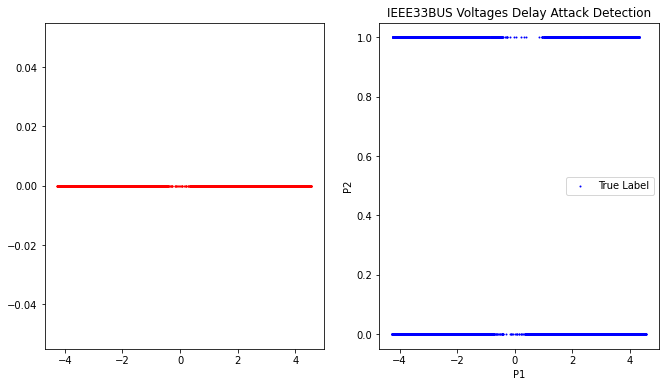

In [112]:
fig, ax = plt.subplots(ncols = 2) 
fig.set_figheight(6)
fig.set_figwidth(11)
ax[0].scatter(X_test_principal.iloc[:, 0], y_pred[:], s = 1, c = 'red', label = 'Predicted Label', alpha= 1)
ax[1].scatter(X_test_principal.iloc[:, 0], y_test.iloc[:, 0], s = 1, c = 'blue', label = 'True Label', alpha = 1)
#plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = 'b', s = 1 , alpha=1)
#plt.scatter(values.iloc[:, 0], values.iloc[:, 1], c = 'r', s = 1 , alpha=1)
plt.title('IEEE33BUS Voltages Delay Attack Detection')
plt.xlabel('P1')
plt.ylabel('P2')
plt.legend()
plt.show() 

In [ ]:
#index = np.where(label == -1)
#index1 = np.where(label==1)
#index = tuple((i+100000)/20000 for i in index)
#index1 = tuple((i+100000)/20000 for i in index1)

In [ ]:
#plt.scatter(index, X_principal.loc[label == -1, 1], s = 1, c = 'red', label = 'Outliers Data')
#plt.scatter(index1, X_principal.loc[label == 1, 1], s = 1, c = 'blue', label = 'Normal Data')
#plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = 'b', s = 1 , alpha=1)
#plt.scatter(values.iloc[:, 0], values.iloc[:, 1], c = 'r', s = 1 , alpha=1)
#plt.title('IEEE33BUS Voltages Delay Attack Detection')
#plt.xlabel('Time')
#plt.ylabel('V')
#plt.legend()
#plt.show() 

In [ ]:
#ind = pd.Series(range(1,500001))
#ind = (ind/20000)+5
#plt.scatter(index, X_principal.loc[label == -1, 1], s = 1, c = 'red', label = 'Outliers Data')

In [ ]:
#plt.scatter(ind[200000:260001], X_principal.loc[200000:260000,1], s = 1 )